In [26]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import files

trainorig = pd.read_csv('train_jqd04QH.csv')
testorig = pd.read_csv('test_GYi4Gz5.csv')

Explore the data --------------------------------------------------------------------------------------

In [3]:
trainorig.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0


In [4]:
trainorig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [5]:
trainorig.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
#enrollee_id', - id
#'city', - categ                
#'city_development_index', - cont
#'gender', - categ
#'relevent_experience', - cont 
#'enrolled_university', -categ
#'education_level', - categ/cont
#'major_discipline', - categ
#'experience', - cont
#'company_size', - cont
#'company_type', - categ
#'last_new_job', -cont
#'training_hours', -cont
#'target' -categ

#for categ - check max freq - assign this val to missing values
#for cont - find central tendency - using mean,median mode - use histo, barplot

In [22]:
#we have null values in 

#-gender (4000+)  - dependent on city, 
#-enrolled_university(200+) 
#-education_level  (400+)
#-major_discipline (3000+)
#-experience (58)
#-company_size (5000+)
#-company_type (5000+)
#-last_new_job(350+)

#TODO : Deal with missing values#

In [ ]:
#another way to fill missing values - 

#if checking wrt another val, 
#    and both values are continuous - use scatter plot

#Scatter plot shows the relationship between two variable 
#but does not indicates the strength of relationship amongst them. 
#To find the strength of the relationship, we use Correlation.



In [7]:
trainorig.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
trainorig.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [25]:
trainorig['target'].value_counts(normalize = True)

0    0.867912
1    0.132088
Name: target, dtype: float64

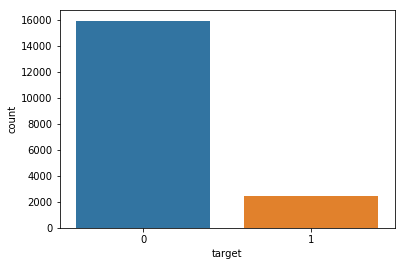

In [27]:
ax = sns.countplot(x="target", data=trainorig)#, hue = 'is_pass')

In [ ]:
#here we can see that almost 86% of data has '0' target value while only 13% data has '1' target value
#hence while building the model, we need to ensure that equal proportions of both are taken

In [15]:
#trainorig['city'].unique()

In [ ]:
#TODO : check which city performs best, and which worst

In [ ]:
#TODO : convert university names to numerical

In [28]:
#trainorig.city.unique
trainorig['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

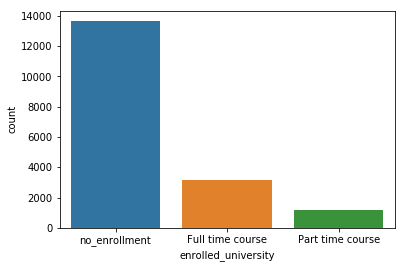

In [30]:
ax = sns.countplot(x="enrolled_university", data=trainorig)

In [ ]:
#Deducations :
#1.most of the job lookers are already unemployed, 
#2. few are alredy on a full time, and further few are working parttime.

In [31]:
#TODO : check which university performs best, and which worst

In [16]:
#TODO : convert education_level names to numerical

In [32]:
#trainorig.city.unique
trainorig['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

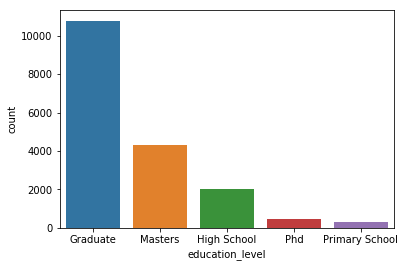

In [34]:
ax = sns.countplot(x="education_level", data=trainorig)

In [ ]:
#Deducation:
#1. Majority are graduates, followed by post graduates
#2. we have a few studuying in primary school as well.

In [18]:
#TODO : check which education_level performs best, and which worst

In [ ]:
#TODO : convert major_discipline names to numerical

In [35]:
#trainorig.city.unique
trainorig['major_discipline'].unique()

array(['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

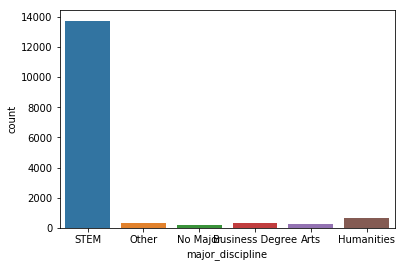

In [37]:
ax = sns.countplot(x="major_discipline", data=trainorig)

In [38]:
#Deduction :
#1. STEM (Science Technology, engineering, mathematics) comprise majority of the students.

In [ ]:
#TODO : check which discipline performs best, and which worst

In [ ]:
#TODO : divide into lesser buckets, 
#TODO : before that draw factorplot to find appropriate bucket range

In [39]:
#trainorig.city.unique
trainorig['experience'].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

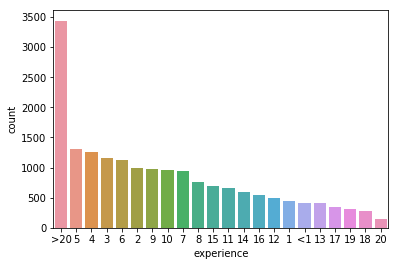

In [47]:
ax = sns.countplot(x="experience", data=trainorig,order = trainorig['experience'].value_counts().index)

In [48]:
#Deduction :
#1. Majority people have more than 20 years of experience
#2. There are a lot of people with upto 10 years of experience

In [22]:
#find correlation bw training experience and target (active candidate)

In [ ]:
#TODO : divide into lesser buckets, 
#TODO : before that draw factorplot to find appropriate bucket range

In [49]:
#trainorig.city.unique
trainorig['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

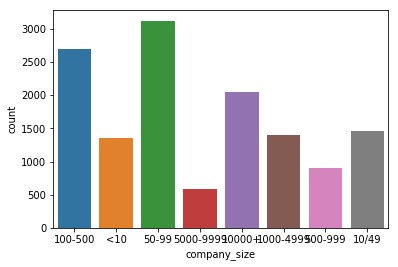

In [50]:
ax = sns.countplot(x="company_size", data=trainorig)

In [23]:
#TODO : convert company_type names to numerical

In [51]:
#trainorig.city.unique
trainorig['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', nan,
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

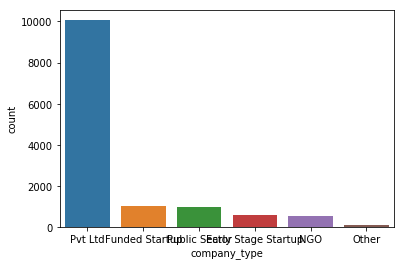

In [52]:
ax = sns.countplot(x="company_type", data=trainorig)

In [44]:
#trainorig.city.unique
trainorig['last_new_job'].nunique()

6

In [53]:
#trainorig.city.unique
trainorig['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

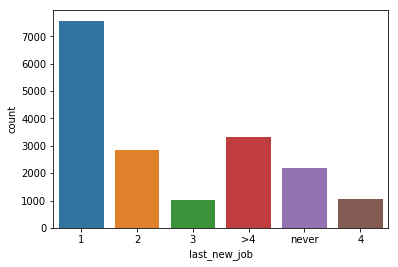

In [54]:
ax = sns.countplot(x="last_new_job", data=trainorig)

In [ ]:
#TODO : convert last new job names to numerical

In [55]:
#trainorig.city.unique
trainorig['training_hours'].nunique()

241

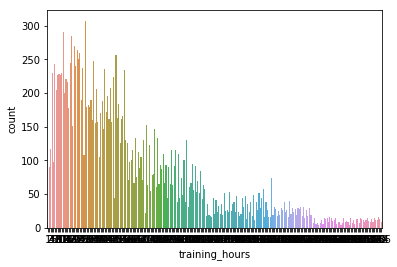

In [56]:
ax = sns.countplot(x="training_hours", data=trainorig)
#TODO - find a better method to plot this info

In [ ]:
#TODO: draw factor plot to find buckets and then divide em into em

In [47]:
#trainorig.city.unique
trainorig['training_hours'].unique()

array([106,  69,   4,  26,  88,  34,  23,   8,  10,  85,  55,  13,  51,
        28,  35,  42,  45,  11,  12,  54,  89,  41, 298, 101, 114, 104,
        53,  39,  20, 109,   3,  68, 262,  16,  22,  67,  43,   7,  30,
         9, 112,  21, 166, 110,  18,  79,  98,  65,  61,  44, 170, 132,
       145,  48,  46,  37,  86,  96,  33, 152, 168, 128, 102,   6,  50,
        36,  90, 164,  56,  32,  17, 126,  72,  15,  80,  25,  31, 160,
        66,  24, 200,  47,  83,  58,  29, 206,  14, 105,  91, 218,  75,
        57,  19, 144,  92,  94, 184,  62, 140,  52, 258, 178, 270, 108,
       157, 156, 123,  59,  82,  60,   2, 196,  95,  84,   5, 146, 202,
       100, 111, 254,  27, 336,  64, 107,  76,  38, 134, 330, 204, 320,
        74,  73,  40,  87, 316, 118, 122, 282, 248, 153, 147,  70, 131,
       113, 216, 292,  81, 176,  78, 222, 163,  63, 280, 210, 294, 264,
       155,  77,  97, 224, 180, 236, 125, 162, 116, 158, 256,  49,  71,
       326,   1, 238, 124, 268, 214, 192, 232, 276, 165, 138, 31

In [48]:
trainorig['target'].unique()

array([0, 1])